Import knihoven


In [102]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt
import math


Import souboru se jmeny 

In [103]:
#loads coco.names into list classNames 
#classesfile='coco.names'
#classNames=[]
#with open(classesfile,'rt') as f:
 #   classNames=f.read().rstrip('\n').split('\n')

Model

In [104]:
model = YOLO('bear detection.pt')#loads the model 

Pokud chci hledat urcity objekt zjisti jeho id

In [105]:
#searched_object = 'pottedplant' #name of object I want to find
#object_id = classNames.index(searched_object)# gets id of the object I want to find  
#print(object_id)

nacte a zobrazy zvoleny obrazek

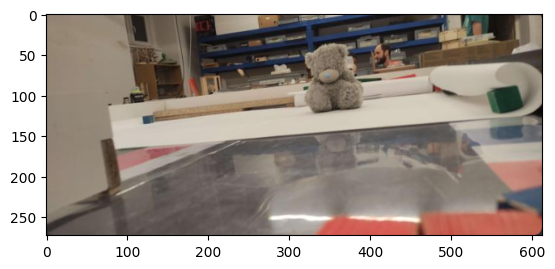

In [106]:
img = cv2.imread('test1.png')#loads the picture into variable 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model  

zjisti velikost obrazku 

In [107]:
img_height,img_width,img_channels = img.shape# gets some info 
print('width',img_width,'Px')#width
print('height',img_height,'Px')#height 
print('channels',img_channels)#colour channels 

width 613 Px
height 273 Px
channels 3


pouziti modelu na nalezeni objektu

In [108]:
results = model(img)#applies model on the image 



0: 288x640 1 teddy bears, 319.4ms
Speed: 3.5ms preprocess, 319.4ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 640)


vykresleni jednotlivych objektu na obrazek

In [109]:
objects_ids = []#list for ids of found objects 
objects_centers = []#list for objects centers 
objects_heights = []# list for objects height, used for calculating distance of the objects
distances = [] 
for r in results:
        boxes = r.boxes
        for box in boxes:
            #cls = int(box.cls[0])#gets the object id 
            #print(classNames[cls])#prints the object class 
            #print(cls) #prints the object id 
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            #if cls == 77:
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            #if cls == 77:
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu
            #if cls == 77:
            #cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            #objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
            distance = img_height-y1-y2
            print(distance)
            distances.append(distance)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,0),thickness=2 )#vykresli na video primku stredem videa

X= 25 Y= 149 W= 417 H= 273
center: 221 211
confidence: 34
-149


array([[[ 86,  94, 100],
        [111, 129, 140],
        [112, 130, 141],
        ...,
        [ 56,  51,  49],
        [ 56,  51,  49],
        [ 56,  51,  49]],

       [[110, 128, 139],
        [111, 129, 140],
        [112, 130, 141],
        ...,
        [106, 122, 134],
        [ 67,  71,  74],
        [ 45,  41,  39]],

       [[110, 128, 140],
        [111, 129, 141],
        [112, 130, 142],
        ...,
        [119, 137, 151],
        [110, 125, 138],
        [ 51,  46,  44]],

       ...,

       [[ 53,  48,  46],
        [ 54,  54,  56],
        [ 59,  64,  69],
        ...,
        [ 53,  48,  46],
        [ 53,  48,  46],
        [ 53,  48,  46]],

       [[ 53,  48,  46],
        [ 53,  48,  46],
        [ 59,  57,  58],
        ...,
        [ 53,  48,  46],
        [ 53,  48,  46],
        [ 53,  48,  46]],

       [[ 53,  48,  46],
        [ 53,  48,  46],
        [ 53,  48,  46],
        ...,
        [ 53,  48,  46],
        [ 53,  48,  46],
        [ 53,  48,  46]]

vypise id nalezenych objektu 

In [110]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[]
[(221, 211)]
[273]


hledani urciteho objektu

In [111]:
#a = objects_ids.index(0)#in list object_ids search for specific number and returns index of the number
print(a)#prints the index 
x,y=objects_centers[0]#in list finds values for given index
print(x,y)#prints the values 
center_line = int(img_width/2)# x coordinates of image center
object_deviation = center_line-x # deviation of object from center of the screen 
print('deviation = ',object_deviation) 
h = objects_heights[a] # for given index finds object height 
print(h)
#measuring distances 
d=distances[a] # for given index finds distance of the object in px 
cv2.line(img,(0,(img_height-d)),(img_width,(img_height-d)),(0,255,0),thickness=2) #draws a line where is the object 
print(d) # prints object distance in px
#calculator from px to cm 
#if distance in px is larger than 240 px use this equation
if d>240:
    distance_cm = 0.001894930772332081 * (d- 62.49315340028377 )**2+ 41.845975945942605
#if distance in px is smaller than 240 px use this equation
if d<240:
    distance_cm = np.exp( 3.486047002894599 )*np.exp(0.0045*d)
print('distance:',distance_cm,'cm')# prints the value in cm
#angle calculating 
angle = math.atan(object_deviation/d)
print(np.rad2deg(angle),'°')
#way lenght 
w = distance_cm/(math.cos(abs(angle)))
print('distance to target:',w,'cm')





0
221 211
deviation =  85
273
-149
distance: 16.70230949365928 cm
-29.703452685569932 °
distance to target: 19.228963443968137 cm


ukaze obrazek

tensor([[2.5365e+01, 1.4909e+02, 4.1797e+02, 2.7300e+02, 3.4648e-01, 0.0000e+00]])


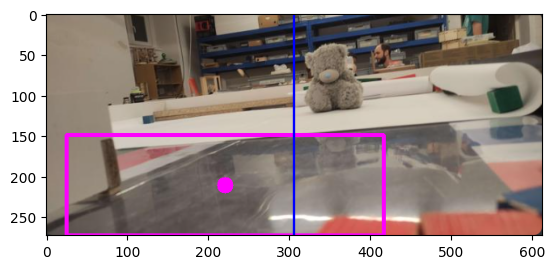

In [112]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
